# In this notebook we visualize effects of inserting a single CTCF in multiple backgrounds

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
# def load_data(h5_dirs, scd_stats, models=[1]):
#     dfs = []
#     for h5_file in glob.glob(h5_dirs):

#         dfs.append(
#             akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
#         )
#     dfs = pd.concat(dfs)

#     for stat in scd_stats:
#         for model in models:
#             dfs[f"mean_{stat}_score_m{model}"] = (
#                 dfs[f"{stat}_h1_m{model}_t0"]
#                 + dfs[f"{stat}_h1_m{model}_t1"]
#                 + dfs[f"{stat}_h1_m{model}_t2"]
#                 + dfs[f"{stat}_h1_m{model}_t3"]
#                 + dfs[f"{stat}_h1_m{model}_t4"]
#                 + dfs[f"{stat}_h1_m{model}_t5"]
#             ) / 6

#     return dfs.reset_index(drop=True)


# import numpy as np


def load_data(h5_dirs, scd_stats, models=[1]):
    for h5_num, h5_file in enumerate(glob.glob(h5_dirs)):
        df = akita_utils.format_io.h5_to_df(
            h5_file, scd_stats, drop_duplicates_key=None
        )
        if h5_num == 0:
            merged_df = df
        else:
            merged_df = pd.merge(
                merged_df,
                df,
                on="background_seqs",
                how="inner",
                suffixes=(f"", f"_{h5_num}"),
            )
        print(f"{h5_num}")

    print("Here")
    for stat in scd_stats:
        for model in models:
            merged_df[f"mean_{stat}_score_m{model}"] = (
                merged_df[f"{stat}_h1_m{model}_t0"]
                + merged_df[f"{stat}_h1_m{model}_t1"]
                + merged_df[f"{stat}_h1_m{model}_t2"]
                + merged_df[f"{stat}_h1_m{model}_t3"]
                + merged_df[f"{stat}_h1_m{model}_t4"]
                + merged_df[f"{stat}_h1_m{model}_t5"]
            ) / 6

        # Calculate mean score over models for current statistic
        mean_score = np.mean(
            [merged_df[f"mean_{stat}_score_m{model}"] for model in models], axis=0
        )

        # Add mean score column to DataFrame
        merged_df[f"mean_{stat}_score"] = mean_score

    return merged_df.reset_index(drop=True)


def load_data(h5_dirs, scd_stats, models=[1]):
    model_dfs = {}
    for h5_num, h5_file in enumerate(glob.glob(h5_dirs)):
        for model in models:
            if f"model{model}" in h5_file:
                df = akita_utils.format_io.h5_to_df(
                    h5_file, scd_stats, drop_duplicates_key=None
                )
                if f"model{model}" in model_dfs.keys():
                    model_dfs[f"model{model}"] = pd.concat(
                        [model_dfs[f"model{model}"], df]
                    )
                else:
                    model_dfs[f"model{model}"] = df

    for df_num, df in enumerate(model_dfs.values()):
        if df_num == 0:
            merged_df = df
        else:
            merged_df = pd.merge(
                merged_df,
                df,
                on="background_seqs",
                how="inner",
                suffixes=("", f"_{df_num}"),
            )

    for stat in scd_stats:
        for model in models:
            merged_df[f"mean_{stat}_score_m{model}"] = (
                merged_df[f"{stat}_h1_m{model}_t0"]
                + merged_df[f"{stat}_h1_m{model}_t1"]
                + merged_df[f"{stat}_h1_m{model}_t2"]
                + merged_df[f"{stat}_h1_m{model}_t3"]
                + merged_df[f"{stat}_h1_m{model}_t4"]
                + merged_df[f"{stat}_h1_m{model}_t5"]
            ) / 6

        # Calculate mean score over models for current statistic
        mean_score = np.mean(
            [merged_df[f"mean_{stat}_score_m{model}"] for model in models], axis=0
        )

        # Add mean score column to DataFrame
        merged_df[f"mean_{stat}_score"] = mean_score

    return merged_df.reset_index(drop=True)

In [3]:
# def load_data(h5_dirs, scd_stats, models=[1], batch_size=1000):
#     batches = []
#     for h5_file in glob.glob(h5_dirs):
#         df = akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
#         batches.append(df)
#         if len(batches) == batch_size:
#             batch_df = pd.concat(batches, ignore_index=True)
#             batches = []
#             for stat in scd_stats:
#                 for model in models:
#                     batch_df[f"mean_{stat}_score_m{model}"] = (
#                         batch_df[f"{stat}_h1_m{model}_t0"]
#                         + batch_df[f"{stat}_h1_m{model}_t1"]
#                         + batch_df[f"{stat}_h1_m{model}_t2"]
#                         + batch_df[f"{stat}_h1_m{model}_t3"]
#                         + batch_df[f"{stat}_h1_m{model}_t4"]
#                         + batch_df[f"{stat}_h1_m{model}_t5"]
#                     ) / 6

#                 # Calculate mean score over models for current statistic
#                 mean_score = np.mean([
#                     batch_df[f"mean_{stat}_score_m{model}"] for model in models
#                 ], axis=0)

#                 # Add mean score column to DataFrame
#                 batch_df[f"mean_{stat}_score"] = mean_score
#             batches.append(batch_df)

#     if len(batches) > 0:
#         batch_df = pd.concat(batches, ignore_index=True)
#         for stat in scd_stats:
#             for model in models:
#                 batch_df[f"mean_{stat}_score_m{model}"] = (
#                     batch_df[f"{stat}_h1_m{model}_t0"]
#                     + batch_df[f"{stat}_h1_m{model}_t1"]
#                     + batch_df[f"{stat}_h1_m{model}_t2"]
#                     + batch_df[f"{stat}_h1_m{model}_t3"]
#                     + batch_df[f"{stat}_h1_m{model}_t4"]
#                     + batch_df[f"{stat}_h1_m{model}_t5"]
#                 ) / 6

#             # Calculate mean score over models for current statistic
#             mean_score = np.mean([
#                 batch_df[f"mean_{stat}_score_m{model}"] for model in models
#             ], axis=0)

#             # Add mean score column to DataFrame
#             batch_df[f"mean_{stat}_score"] = mean_score
#         batches.append(batch_df)

#     return pd.concat(batches, ignore_index=True)

In [4]:
glob.glob(
    "/scratch1/kamulege/insert_experiments/one_strong_motif_at_different_offsets_same_background_1/*/*/*.h5"
)

['/scratch1/kamulege/insert_experiments/one_strong_motif_at_different_offsets_same_background_1/insert_expt_model3_head1/job0/scd.h5']

In [5]:
one_strong_motif_at_different_offsets_same_background_h5_dirs = "/scratch1/kamulege/insert_experiments/one_strong_motif_at_different_offsets_same_background/*/*/*.h5"
one_weak_motif_at_different_offsets_same_background_h5_dirs = "/scratch1/kamulege/insert_experiments/one_weak_motif_at_different_offsets_same_background/*/*/*.h5"

scd_stats = ["SCD"]

print("Here")

one_strong_motif_at_different_offsets_same_background_df = load_data(
    one_strong_motif_at_different_offsets_same_background_h5_dirs,
    scd_stats=["SCD", "SSD"],
    models=[0, 1, 2],
)
one_weak_motif_at_different_offsets_same_background_df = load_data(
    one_weak_motif_at_different_offsets_same_background_h5_dirs,
    scd_stats=["SCD", "SSD"],
    models=[0, 1, 2, 3],
)

one_weak_motif_at_different_offsets_same_background_df

Here


,CTCF_1_genomic_SCD,CTCF_1_insert,SCD_h1_m3_t0,SCD_h1_m3_t1,SCD_h1_m3_t2,SCD_h1_m3_t3,SCD_h1_m3_t4,SCD_h1_m3_t5,SSD_h1_m3_t0,SSD_h1_m3_t1,...,mean_SCD_score_m0,mean_SCD_score_m1,mean_SCD_score_m2,mean_SCD_score_m3,mean_SCD_score,mean_SSD_score_m0,mean_SSD_score_m1,mean_SSD_score_m2,mean_SSD_score_m3,mean_SSD_score
0,0.05832,"chr8,45342919,45342938,+,0,-1000,>",0.039429,0.041138,0.020187,0.019653,0.024109,0.020462,0.039429,0.041138,...,0.037720,0.066833,0.050903,0.027512,0.045746,0.037720,0.066833,0.050903,0.027512,0.045746
1,0.05832,"chr8,45342919,45342938,+,0,-1000,>",0.039429,0.041138,0.020187,0.019653,0.024109,0.020462,0.039429,0.041138,...,0.032715,0.066833,0.050903,0.027512,0.044495,0.032715,0.066833,0.050903,0.027512,0.044495
2,0.05832,"chr8,45342919,45342938,+,0,-1000,>",0.039429,0.041138,0.020187,0.019653,0.024109,0.020462,0.039429,0.041138,...,0.032379,0.066833,0.050903,0.027512,0.044403,0.032379,0.066833,0.050903,0.027512,0.044403
3,0.05832,"chr8,45342919,45342938,+,0,-1000,>",0.039429,0.041138,0.020187,0.019653,0.024109,0.020462,0.039429,0.041138,...,0.033356,0.066833,0.050903,0.027512,0.044647,0.033356,0.066833,0.050903,0.027512,0.044647
4,0.05832,"chr8,45342919,45342938,+,0,-1000,>",0.039429,0.041138,0.020187,0.019653,0.024109,0.020462,0.039429,0.041138,...,0.043457,0.066833,0.050903,0.027512,0.047180,0.043457,0.066833,0.050903,0.027512,0.047180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20987,0.05832,"chr8,45342919,45342938,+,0,1000,>",0.049011,0.054199,0.029541,0.027817,0.035583,0.029312,0.049011,0.054199,...,0.033356,0.082764,0.061859,0.037598,0.053894,0.033356,0.082764,0.061859,0.037598,0.053894
20988,0.05832,"chr8,45342919,45342938,+,0,1000,>",0.049011,0.054199,0.029541,0.027817,0.035583,0.029312,0.049011,0.054199,...,0.043457,0.082764,0.061859,0.037598,0.056427,0.043457,0.082764,0.061859,0.037598,0.056427
20989,0.05832,"chr8,45342919,45342938,+,0,1000,>",0.049011,0.054199,0.029541,0.027817,0.035583,0.029312,0.049011,0.054199,...,0.038788,0.082764,0.061859,0.037598,0.055237,0.038788,0.082764,0.061859,0.037598,0.055237
20990,0.05832,"chr8,45342919,45342938,+,0,1000,>",0.049011,0.054199,0.029541,0.027817,0.035583,0.029312,0.049011,0.054199,...,0.031204,0.082764,0.061859,0.037598,0.053345,0.031204,0.082764,0.061859,0.037598,0.053345


In [6]:
one_strong_motif_at_different_offsets_same_background_df.columns

Index(['CTCF_1_genomic_SCD', 'CTCF_1_insert', 'SCD_h1_m2_t0', 'SCD_h1_m2_t1',
       'SCD_h1_m2_t2', 'SCD_h1_m2_t3', 'SCD_h1_m2_t4', 'SCD_h1_m2_t5',
       'SSD_h1_m2_t0', 'SSD_h1_m2_t1', 'SSD_h1_m2_t2', 'SSD_h1_m2_t3',
       'SSD_h1_m2_t4', 'SSD_h1_m2_t5', 'background_seqs',
       'CTCF_1_genomic_SCD_1', 'CTCF_1_insert_1', 'SCD_h1_m0_t0',
       'SCD_h1_m0_t1', 'SCD_h1_m0_t2', 'SCD_h1_m0_t3', 'SCD_h1_m0_t4',
       'SCD_h1_m0_t5', 'SSD_h1_m0_t0', 'SSD_h1_m0_t1', 'SSD_h1_m0_t2',
       'SSD_h1_m0_t3', 'SSD_h1_m0_t4', 'SSD_h1_m0_t5', 'CTCF_1_genomic_SCD_2',
       'CTCF_1_insert_2', 'SCD_h1_m1_t0', 'SCD_h1_m1_t1', 'SCD_h1_m1_t2',
       'SCD_h1_m1_t3', 'SCD_h1_m1_t4', 'SCD_h1_m1_t5', 'SSD_h1_m1_t0',
       'SSD_h1_m1_t1', 'SSD_h1_m1_t2', 'SSD_h1_m1_t3', 'SSD_h1_m1_t4',
       'SSD_h1_m1_t5', 'mean_SCD_score_m0', 'mean_SCD_score_m1',
       'mean_SCD_score_m2', 'mean_SCD_score', 'mean_SSD_score_m0',
       'mean_SSD_score_m1', 'mean_SSD_score_m2', 'mean_SSD_score'],
      dtype='object

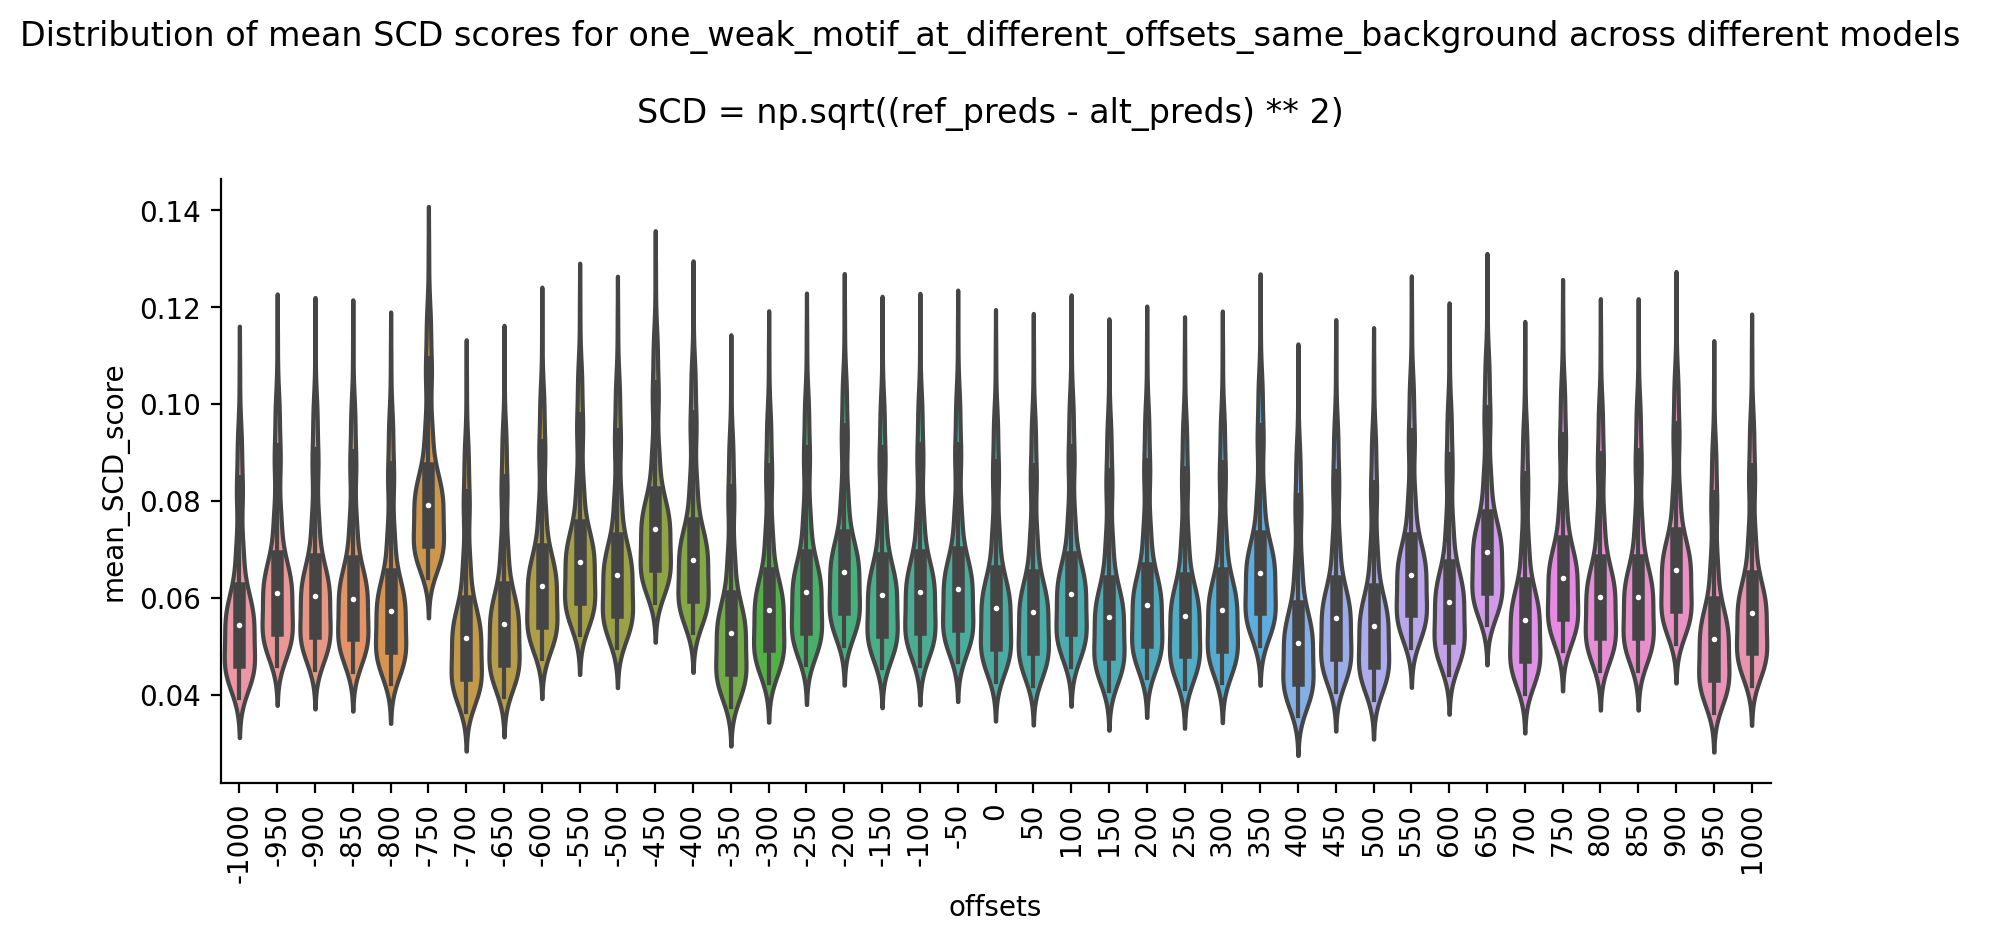

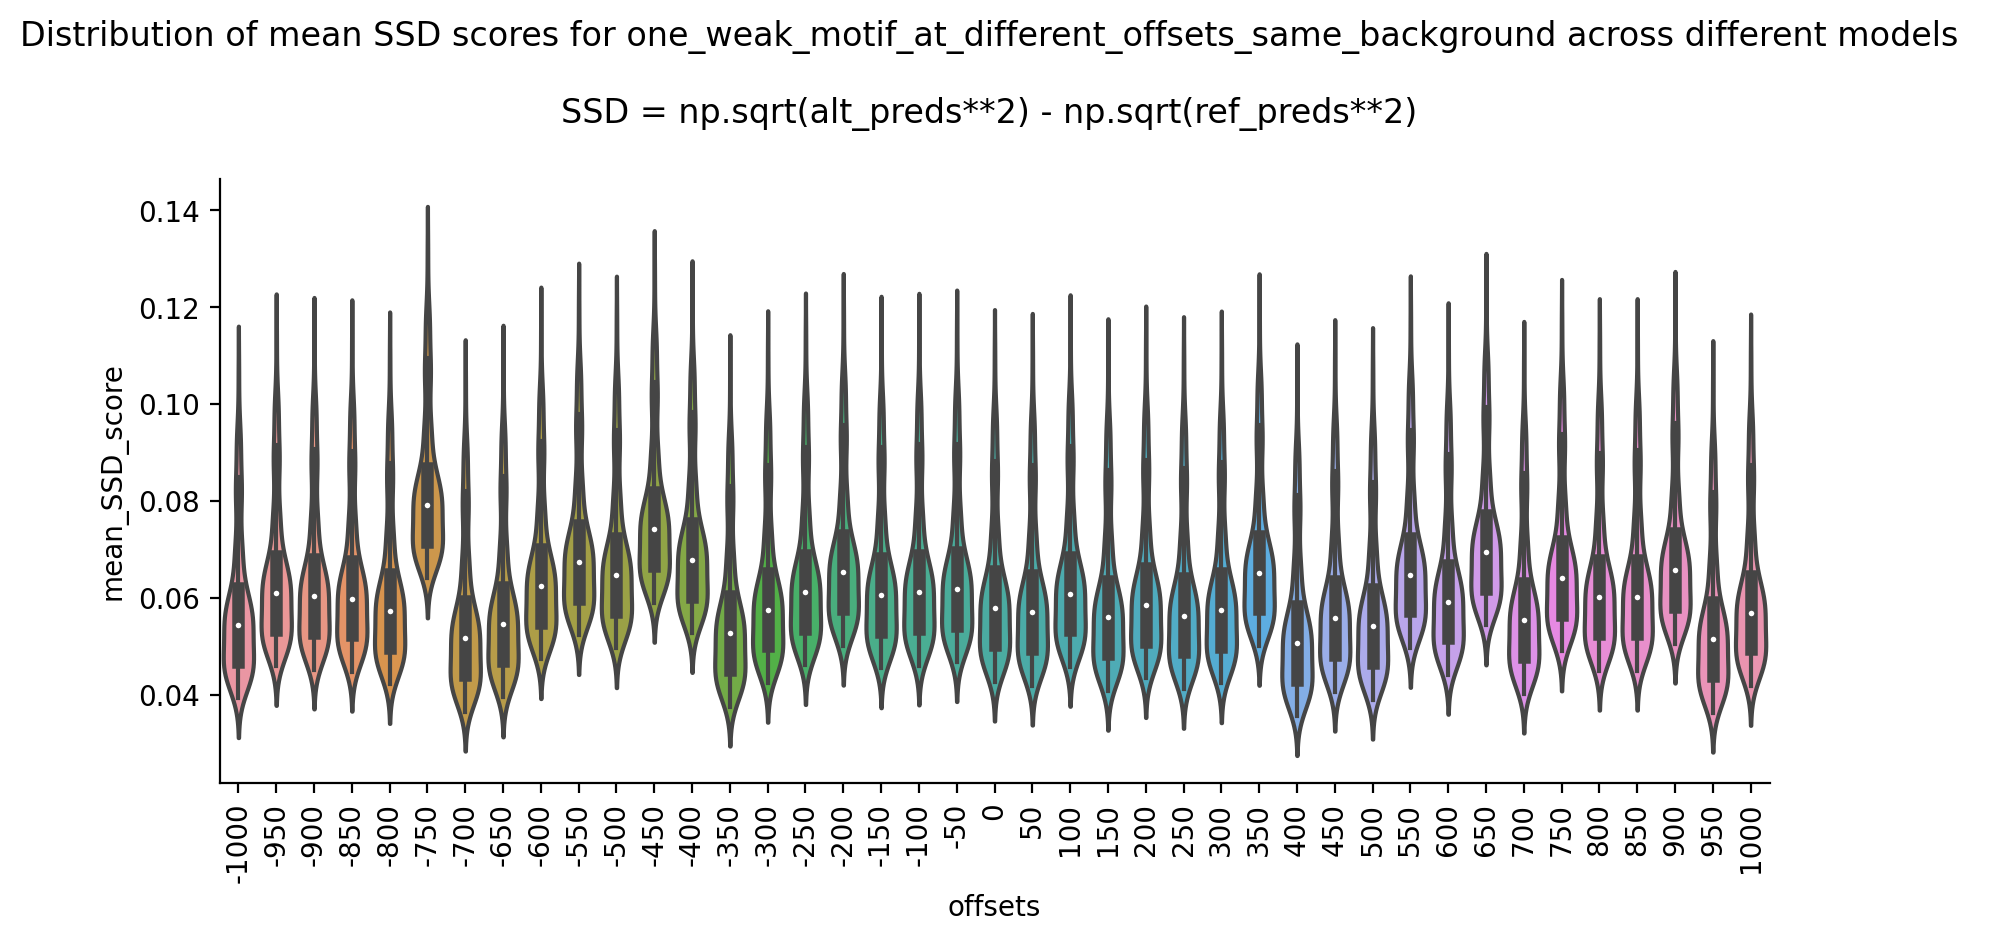

In [7]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
one_weak_motif_at_different_offsets_same_background_df["offsets"] = (
    one_weak_motif_at_different_offsets_same_background_df["CTCF_1_insert"]
    .str.split(",")
    .str[-2]
    .astype(int)
)
data = [one_weak_motif_at_different_offsets_same_background_df[f"offsets"]]
sns.violinplot(
    data=one_weak_motif_at_different_offsets_same_background_df,
    ax=ax,
    x="offsets",
    y="mean_SCD_score",
)
sns.despine(top=True, right=True)
plt.xticks(rotation=90)
plt.title(
    "Distribution of mean SCD scores for one_weak_motif_at_different_offsets_same_background across different models \n \nSCD = np.sqrt((ref_preds - alt_preds) ** 2) \n "
)
plt.show()


fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
one_weak_motif_at_different_offsets_same_background_df["offsets"] = (
    one_weak_motif_at_different_offsets_same_background_df["CTCF_1_insert"]
    .str.split(",")
    .str[-2]
    .astype(int)
)
data = [one_weak_motif_at_different_offsets_same_background_df[f"offsets"]]
sns.violinplot(
    data=one_weak_motif_at_different_offsets_same_background_df,
    ax=ax,
    x="offsets",
    y="mean_SSD_score",
)
sns.despine(top=True, right=True)
plt.xticks(rotation=90)
plt.title(
    "Distribution of mean SSD scores for one_weak_motif_at_different_offsets_same_background across different models \n \nSSD = np.sqrt(alt_preds**2) - np.sqrt(ref_preds**2) \n "
)
plt.show()

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype,

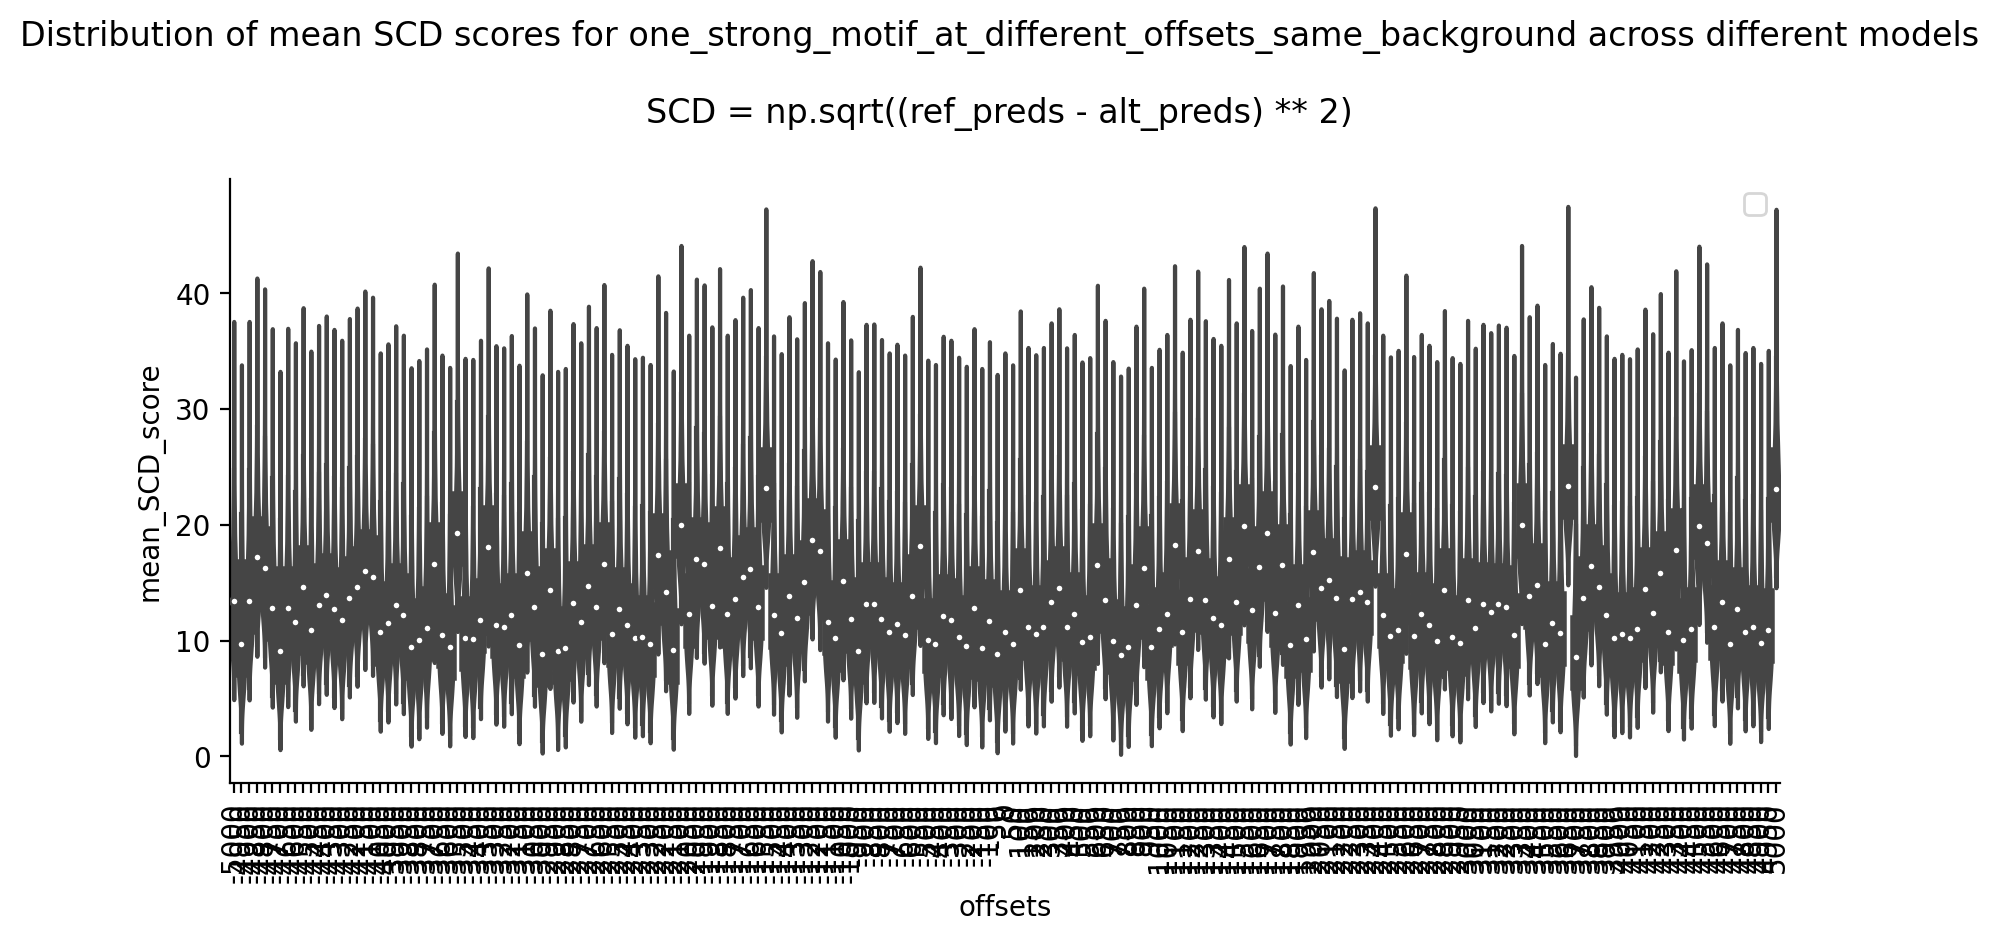

In [8]:
# fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
# one_strong_motif_at_different_offsets_same_background_df["offsets"] = one_strong_motif_at_different_offsets_same_background_df["CTCF_1_insert"].str.split(",").str[-2].astype(int)
# data = [one_strong_motif_at_different_offsets_same_background_df[f"offsets"]]
# sns.lineplot(
#     data=one_strong_motif_at_different_offsets_same_background_df,
#     ax=ax,
#     x="offsets",
#     y="mean_SCD_score"
# )
# sns.lineplot(
#     data=one_strong_motif_at_different_offsets_same_background_df,
#     ax=ax,
#     x="offsets",
#     y="mean_SCD_score_m0"
# )
# sns.lineplot(
#     data=one_strong_motif_at_different_offsets_same_background_df,
#     ax=ax,
#     x="offsets",
#     y="mean_SCD_score_m1"
# )
# sns.despine(top=True, right=True)
# plt.xticks(rotation=90)
# plt.title("Distribution of mean SCD scores for one_weak_motif_at_different_offsets_same_background across different models \n \nSCD = np.sqrt((ref_preds - alt_preds) ** 2) \n ")
# plt.show()


# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

# Add new column to DataFrame
one_strong_motif_at_different_offsets_same_background_df["offsets"] = (
    one_strong_motif_at_different_offsets_same_background_df["CTCF_1_insert"]
    .str.split(",")
    .str[-2]
    .astype(int)
)

# Create line plots
sns.violinplot(
    data=one_strong_motif_at_different_offsets_same_background_df,
    ax=ax,
    x="offsets",
    y="mean_SCD_score",
    label="mean_SCD_score",
)
# sns.lineplot(data=one_strong_motif_at_different_offsets_same_background_df, ax=ax, x="offsets", y="mean_SCD_score_m0", label="mean_SCD_score_m0")
# sns.lineplot(data=one_strong_motif_at_different_offsets_same_background_df, ax=ax, x="offsets", y="mean_SCD_score_m1", label="mean_SCD_score_m1")
# sns.lineplot(data=one_strong_motif_at_different_offsets_same_background_df, ax=ax, x="offsets", y="mean_SCD_score_m2", label="mean_SCD_score_m2")

# Remove spines and rotate x-tick labels
sns.despine(top=True, right=True)
plt.xticks(rotation=90)

# Add title, legend, and display plot
plt.title(
    "Distribution of mean SCD scores for one_strong_motif_at_different_offsets_same_background across different models \n \nSCD = np.sqrt((ref_preds - alt_preds) ** 2) \n "
)
plt.legend()
plt.show()


# fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
# one_strong_motif_at_different_offsets_same_background_df["offsets"] = one_strong_motif_at_different_offsets_same_background_df["CTCF_1_insert"].str.split(",").str[-2].astype(int)
# data = [one_strong_motif_at_different_offsets_same_background_df[f"offsets"]]
# sns.lineplot(
#     data=one_strong_motif_at_different_offsets_same_background_df,
#     ax=ax,
#     x="offsets",
#     y="mean_SSD_score"
# )
# sns.despine(top=True, right=True)
# plt.xticks(rotation=90)
# plt.title("Distribution of mean SSD scores for one_weak_motif_at_different_offsets_same_background across different models \n \nSSD = np.sqrt(alt_preds**2) - np.sqrt(ref_preds**2) \n ")
# plt.show()

In [9]:
# [i for i in range(-5000,5050,50)]

In [10]:
# h5_dirs = "/scratch1/kamulege/insert_experiments/1000_uniformly_selcted_model1_motifs/*/*/*.h5"
# for h5_num, h5_file in enumerate(glob.glob(h5_dirs)):
#     df = akita_utils.format_io.h5_to_df(h5_file, drop_duplicates_key=True)
#     if h5_num ==0:
#         merged_df=df
#     else:
#         merged_df = pd.concat([merged_df, df])

# merged_df